Workbook for topic modeling.

In [12]:
import pandas as pd

# Load the CSV data into a DataFrame
jokes_df = pd.read_csv('jokes_dataset.csv')

# print the first 5 rows of the DataFrame
print(jokes_df.head())


                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False


In [13]:
import nltk
from nltk.corpus import stopwords
import string
import re

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['clean_joke'] = jokes_df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

# Define a function to remove punctuation
def remove_punctuation(text):
    # Define the regular expression pattern to match any punctuation character
    pattern = r'[^\w\s]'

    # Use the sub() function to replace any matches with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:

# Preprocess the jokes
preprocess_jokes(jokes_df)

# Apply the remove_punctuation function to the Clean_joke column
jokes_df['clean_joke'] = jokes_df['clean_joke'].apply(remove_punctuation)


In [15]:

humorous_jokes_df = jokes_df[jokes_df['humor'] == True]


Topic modeling:

LDA is used as a topic modeling technique to discover latent topics in a collection of documents. It models each topic as a probability distribution over the words in the vocabulary to explain the topic-word distributions that best explain the observed document-word occurrences.

For topic modeling with LDA, lemmatization, tokenization and vectorization are used to prepare the text data for input into the model. 

In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('punkt')

# Download NLTK data
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a single document
def lemmatize_doc(doc):
    tokens = nltk.word_tokenize(doc)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Lemmatize the text data
humorous_jokes_df['lemmatized_joke'] = humorous_jokes_df['clean_joke'].apply(lemmatize_doc)

from sklearn.feature_extraction.text import TfidfVectorizer

# Define a custom list of stop words to remove - I know these are common in jokes from domain knowledge
my_stop_words = ['like', 'say', 'im', 'know', 'whats','call','joke']

# Create a TfidfVectorizer object with the custom stop words
vectorizer = TfidfVectorizer(stop_words=my_stop_words)

# Tokenize the lemmatized text data with the custom stop words
tokenized_data = vectorizer.fit_transform(humorous_jokes_df['lemmatized_joke'])

# Train the LDA model on the tokenized data
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tokenized_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-25-b290e3b5eb1b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humorous_jokes_df['lemmatized_joke'] = humorous_jokes_df['clean_joke'].apply(lemmatize_doc)


LatentDirichletAllocation(n_components=5, random_state=42)

In [26]:
feature_names = vectorizer.get_feature_names_out()

for i in range(num_topics):
    topic_words = ' '.join([feature_names[idx] for idx in np.argsort(lda_model.components_[i])[:-11:-1]])
    print(f"Topic {i}:\n{topic_words}\n")


Topic 0:
woman one take many bar coffee get walk go chicken

Topic 1:
knock get people one who man there wife car never

Topic 2:
get trump cant man it make got people one dick

Topic 3:
get people cant go one guy make two day hear

Topic 4:
get na hear girl me one people time never make



Text classification and information retrieval systems often rely on the identification of topics within a set of documents, so topic modeling can be a useful tool in these areas. Additionally, topic modeling can also be used for recommendation systems by identifying topics that are relevant to a user's interests and suggesting items that match those topics.

Use t-SNE to reduce the dimensionality of the topic distributions for each document generated by the LDA model into a two-dimensional space for visualization.

In [27]:
from sklearn.manifold import TSNE

# Get topic distributions for each document
doc_topics = lda_model.transform(tokenized_data)

# Perform t-SNE on the topic distributions
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_jobs=-1, perplexity=50)
tsne_lda = tsne_model.fit_transform(doc_topics)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.107s...
[t-SNE] Computed neighbors for 100000 samples in 6.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

In [28]:
print(doc_topics[:10])


[[0.07086306 0.72130988 0.06860868 0.07119929 0.0680191 ]
 [0.06035395 0.06279146 0.61769814 0.19765097 0.06150548]
 [0.05817817 0.77153909 0.05594012 0.05742853 0.0569141 ]
 [0.74236832 0.06435263 0.06485988 0.06393259 0.06448658]
 [0.05963822 0.06016264 0.05908814 0.059565   0.76154599]
 [0.07013729 0.07127962 0.07093319 0.07003649 0.71761341]
 [0.05640245 0.05876073 0.05896227 0.05724607 0.76862848]
 [0.06513633 0.06349367 0.74239845 0.06509745 0.0638741 ]
 [0.22563879 0.19854297 0.05448777 0.467303   0.05402747]
 [0.06967522 0.06889439 0.06914017 0.06877095 0.72351927]]


Visualize the top words for each topic using LDA.

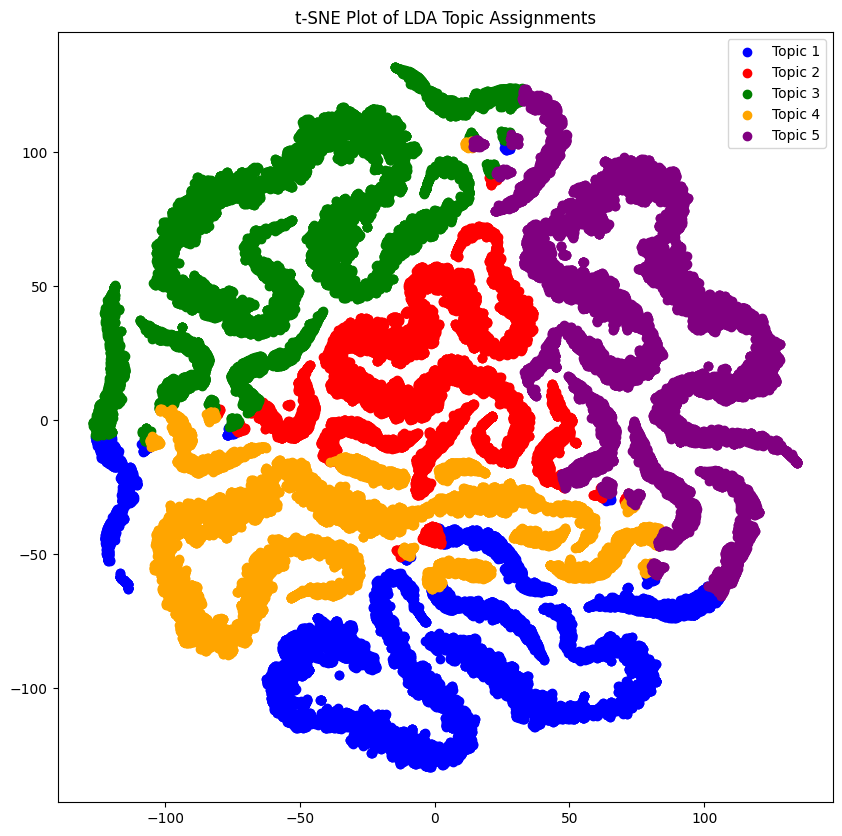

In [33]:
# Create a scatter plot of the t-SNE results, with each point colored according to its assigned topic
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(5):
    ax.scatter(tsne_lda[:, 0][np.where(assigned_topics == i)], tsne_lda[:, 1][np.where(assigned_topics == i)], c=colors[i], label=f'Topic {i+1}')

ax.legend()
ax.set_title("t-SNE Plot of LDA Topic Assignments")
plt.show()


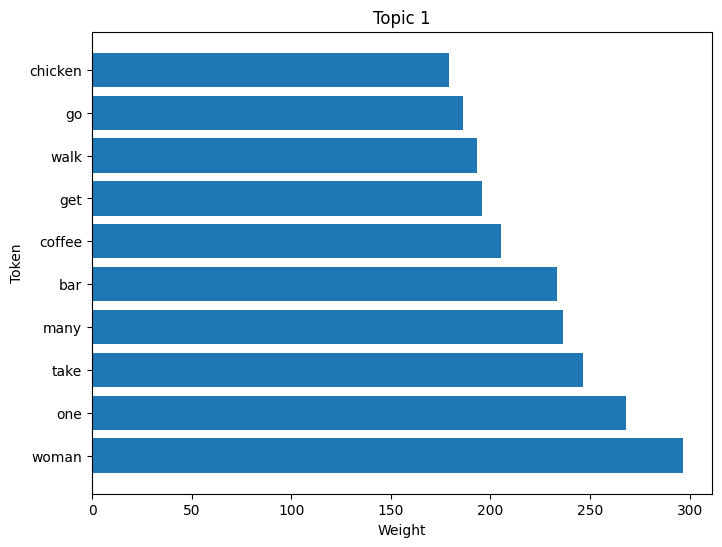

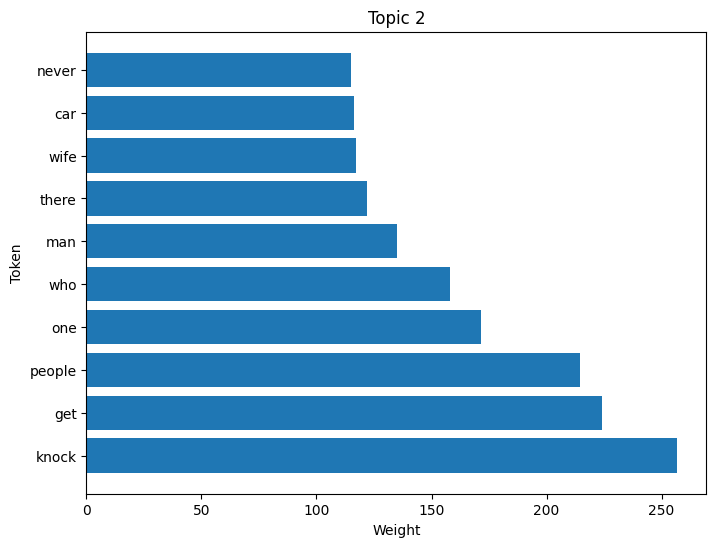

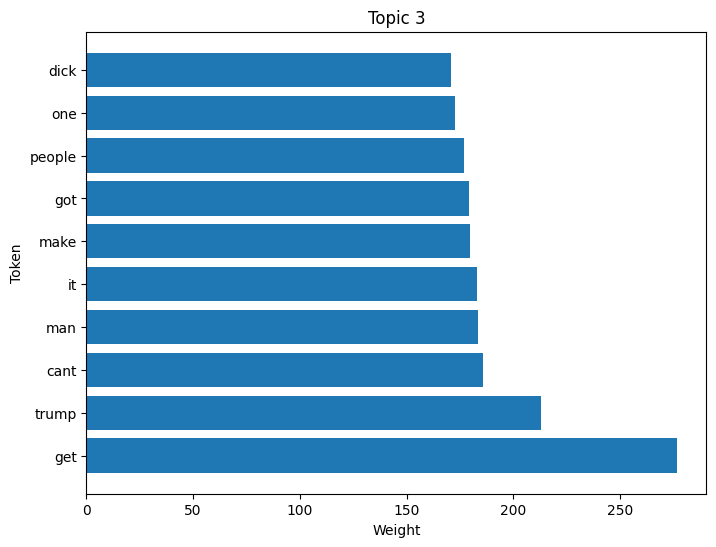

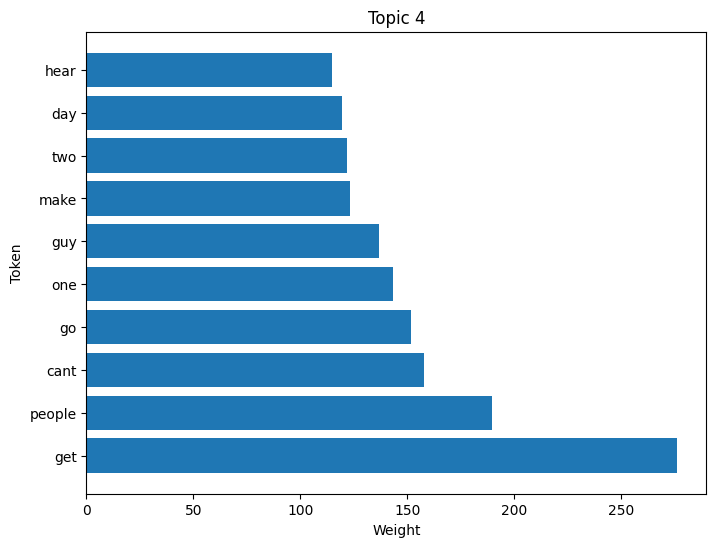

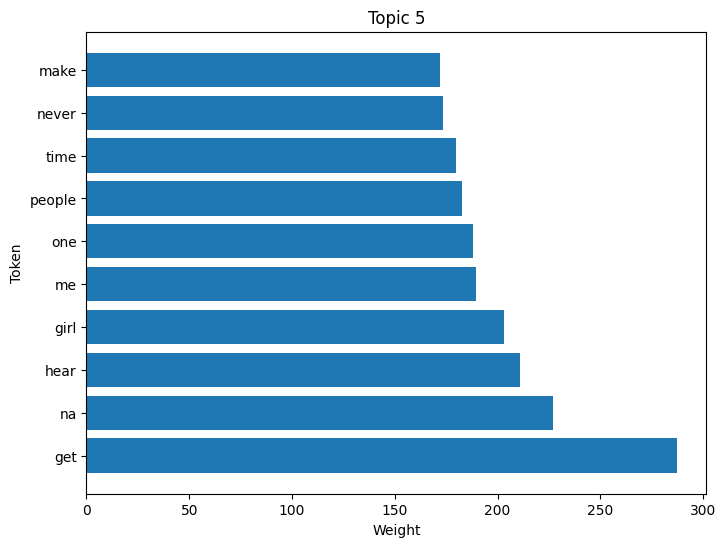

In [30]:
import matplotlib.pyplot as plt

# Define a function to get the top tokens for each topic and their corresponding weights
def get_top_tokens(model, feature_names, n_top_tokens):
    top_tokens = []
    top_weights = []
    for topic_idx, topic in enumerate(model.components_):
        top_tokens_idx = topic.argsort()[:-n_top_tokens - 1:-1]
        top_tokens.append([feature_names[i] for i in top_tokens_idx])
        top_weights.append(topic[top_tokens_idx])
    return top_tokens, top_weights

# Create a list of feature names from the vectorizer object
feature_names = vectorizer.get_feature_names_out()

# Get the top tokens for each topic and their corresponding weights
n_top_tokens = 10
top_tokens, top_weights = get_top_tokens(lda_model, feature_names, n_top_tokens)

# Create a bar plot for each topic
for i, tokens in enumerate(top_tokens):
    plt.figure(figsize=(8,6))
    plt.barh(tokens, top_weights[i])
    plt.title(f'Topic {i+1}')
    plt.xlabel('Weight')
    plt.ylabel('Token')
    plt.show()


Print topic-term matrix using LDA modeling.

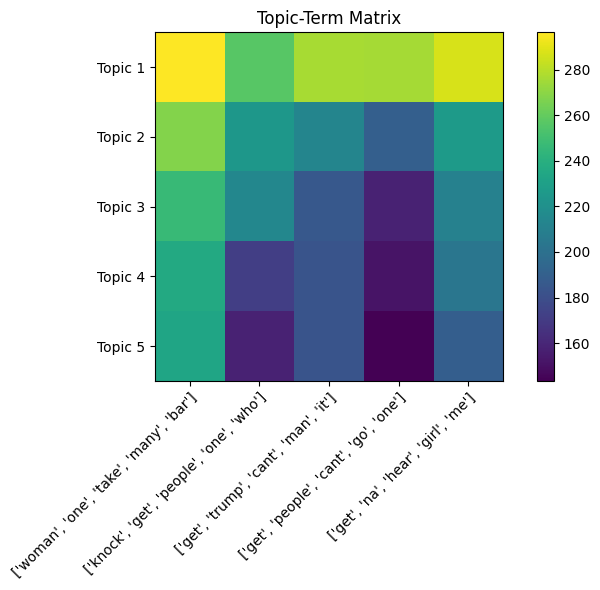

In [31]:
# Create a topic-term matrix
topic_term_matrix = []
for i in range(len(top_tokens)):
    topic_term_matrix.append(top_weights[i])

# Transpose the matrix so that each row represents a term and each column represents a topic
topic_term_matrix = np.array(topic_term_matrix).T

# Create a heatmap of the topic-term matrix
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(topic_term_matrix, cmap='viridis')

# Set axis labels and tick labels
ax.set_xticks(np.arange(len(top_tokens)))
ax.set_yticks(np.arange(len(lda_model.components_)))
ax.set_xticklabels(top_tokens)
ax.set_yticklabels([f'Topic {i+1}' for i in range(len(lda_model.components_))])

# Rotate the x-axis labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and show plot
ax.set_title("Topic-Term Matrix")
fig.tight_layout()
plt.show()


Will also try NMF topic modeling to compare to LDA model.

In [36]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Define a custom list of stop words to remove - I know these are common in jokes from domain knowledge
my_stop_words = ['like', 'say', 'im', 'know', 'whats','call','joke']

# Create a TfidfVectorizer object with the custom stop words
vectorizer = TfidfVectorizer(stop_words=my_stop_words)

# Tokenize the text data with the custom stop words
tokenized_data = vectorizer.fit_transform(jokes_df['clean_joke'])

# Define the number of topics to extract
num_topics = 5

# Train the NMF model on the tokenized data
nmf_model = NMF(n_components=num_topics, init='nndsvd', random_state=42)
nmf_model.fit(tokenized_data)

# Get the top 10 words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words.append([feature_names[i] for i in topic.argsort()[:-11:-1]])

# Print the top 10 words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i}:")
    print(", ".join(words))


Topic 0:
one, make, man, day, time, it, never, two, take, women
Topic 1:
trump, donald, trumps, clinton, hillary, says, president, gop, us, obama
Topic 2:
get, cross, road, chicken, side, it, married, christmas, cant, pregnant
Topic 3:
people, black, world, white, cant, hate, types, 10, think, racist
Topic 4:
new, photos, york, years, video, week, year, fashion, best, 10


In [37]:
from sklearn.manifold import TSNE

# Get topic distributions for each document
doc_topics = nmf_model.transform(tokenized_data)

# Perform t-SNE on the topic distributions
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_jobs=-1, perplexity=50)
tsne_nmf = tsne_model.fit_transform(doc_topics)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200000 samples in 0.269s...
[t-SNE] Computed neighbors for 200000 samples in 39.883s...
[t-SNE] Computed conditional probabilities for sample 1000 / 200000
[t-SNE] Computed conditional probabilities for sample 2000 / 200000
[t-SNE] Computed conditional probabilities for sample 3000 / 200000
[t-SNE] Computed conditional probabilities for sample 4000 / 200000
[t-SNE] Computed conditional probabilities for sample 5000 / 200000
[t-SNE] Computed conditional probabilities for sample 6000 / 200000
[t-SNE] Computed conditional probabilities for sample 7000 / 200000
[t-SNE] Computed conditional probabilities for sample 8000 / 200000
[t-SNE] Computed conditional probabilities for sample 9000 / 200000
[t-SNE] Computed conditional probabilities for sample 10000 / 200000
[t-SNE] Computed conditional probabilities for sample 11000 / 200000
[t-SNE] Computed conditional probabilities for sample 12000 / 200000
[t-SNE] Computed conditional proba

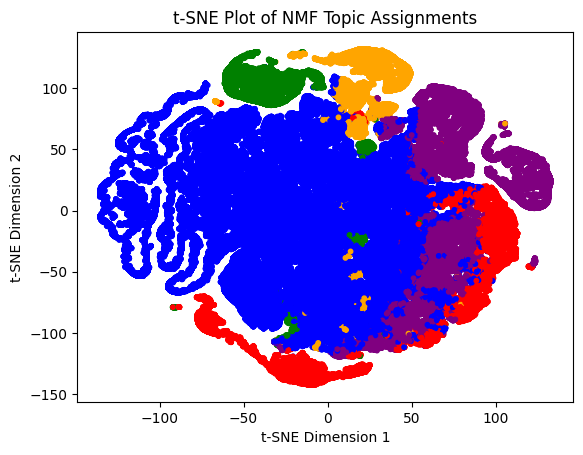

In [41]:
# Assign a color to each topic
colors = ['blue', 'red', 'green', 'orange', 'purple']

topic_labels = np.argmax(doc_topics, axis=1)

# Plot the t-SNE results with different colors for each topic
plt.scatter(tsne_nmf[:, 0], tsne_nmf[:, 1], c=[colors[i] for i in topic_labels], s=10)
plt.title("t-SNE Plot of NMF Topic Assignments")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()



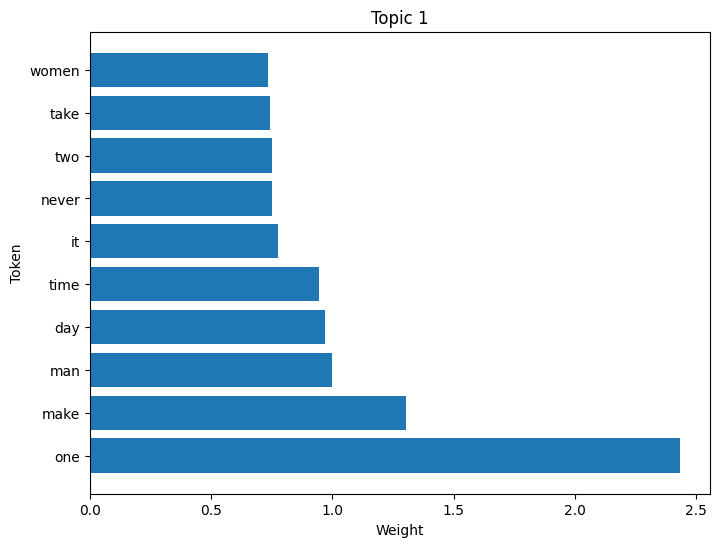

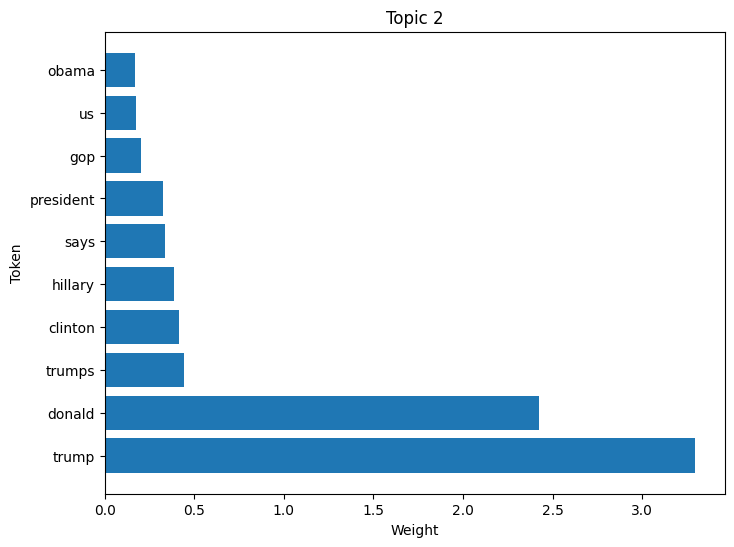

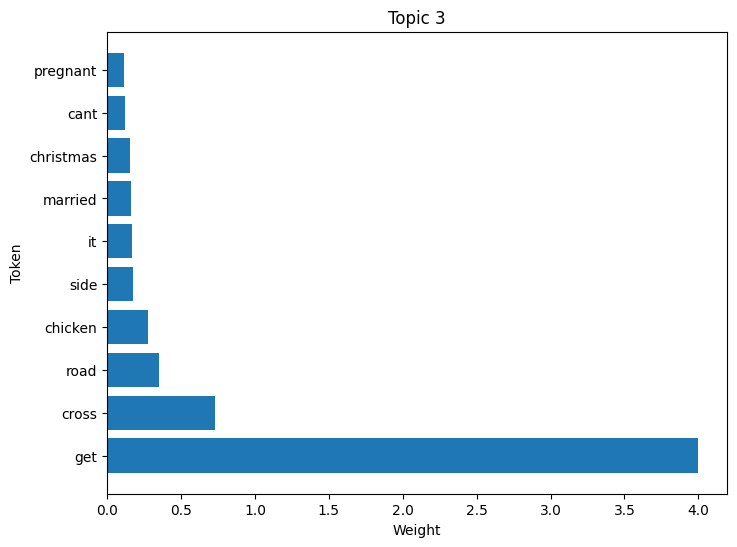

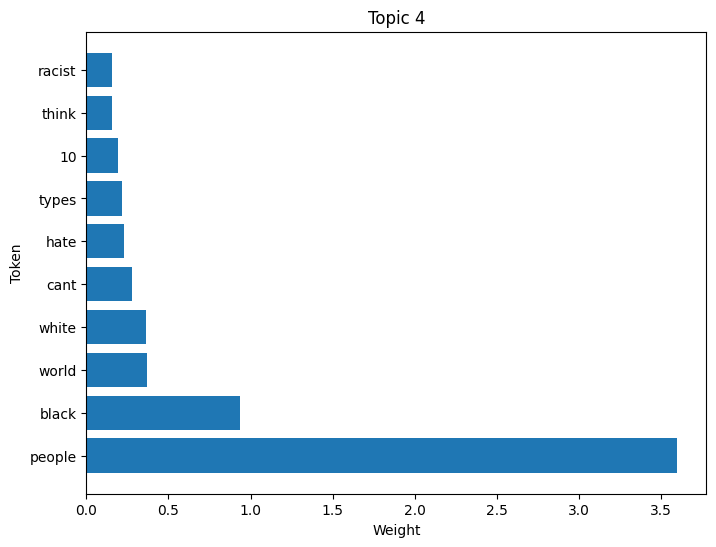

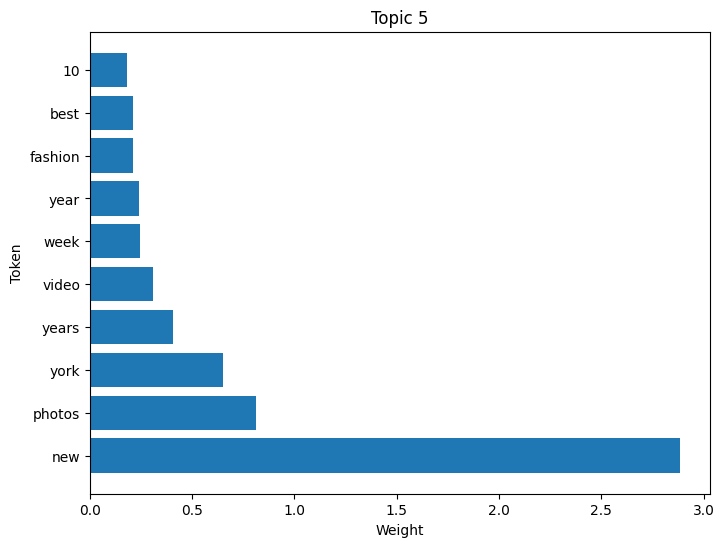

In [38]:
import matplotlib.pyplot as plt

# Define a function to get the top tokens for each topic and their corresponding weights
def get_top_tokens(model, feature_names, n_top_tokens):
    top_tokens = []
    top_weights = []
    for topic_idx, topic in enumerate(model.components_):
        top_tokens_idx = topic.argsort()[:-n_top_tokens - 1:-1]
        top_tokens.append([feature_names[i] for i in top_tokens_idx])
        top_weights.append(topic[top_tokens_idx])
    return top_tokens, top_weights

# Create a list of feature names from the vectorizer object
feature_names = vectorizer.get_feature_names_out()

# Get the top tokens for each topic and their corresponding weights
n_top_tokens = 10
top_tokens, top_weights = get_top_tokens(nmf_model, feature_names, n_top_tokens)

# Create a bar plot for each topic
for i, tokens in enumerate(top_tokens):
    plt.figure(figsize=(8,6))
    plt.barh(tokens, top_weights[i])
    plt.title(f'Topic {i+1}')
    plt.xlabel('Weight')
    plt.ylabel('Token')
    plt.show()


Finally, I perform dimensionality reduction using t-SNE algorithm for jokes vs. non-jokes. The y variable is used to provide labels for each document, indicating whether it is a joke or not. 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.110s...
[t-SNE] Computed neighbors for 20000 samples in 244.904s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

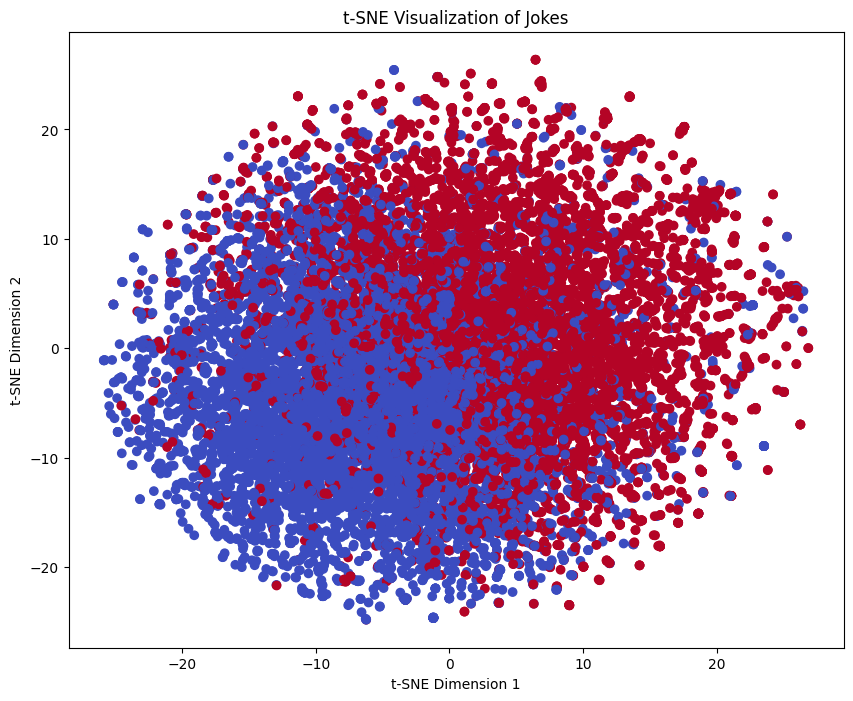

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Define lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

jokes_sampled = jokes_df.sample(n=20000, random_state=42)

# Tokenize and lemmatize the text data
tokenized_data = [joke.split() for joke in jokes_sampled['clean_joke']]
lemmatized_data = [lemmatize(tokens) for tokens in tokenized_data]

# Convert the lemmatized data to a list of strings
text_data = [' '.join(tokens) for tokens in lemmatized_data]

# Create a TF-IDF vectorizer and fit it to the text data
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(text_data)

# Get labels for each document (joke vs. non-joke)
y = jokes_sampled['humor'].values  # replace with your label vector, where each element corresponds to the label for a document

# Perform t-SNE on the TF-IDF matrix with lower perplexity
tsne = TSNE(n_components=2, verbose=1, perplexity=30, random_state=42, n_jobs=-1)
tsne_results = tsne.fit_transform(tfidf.toarray())


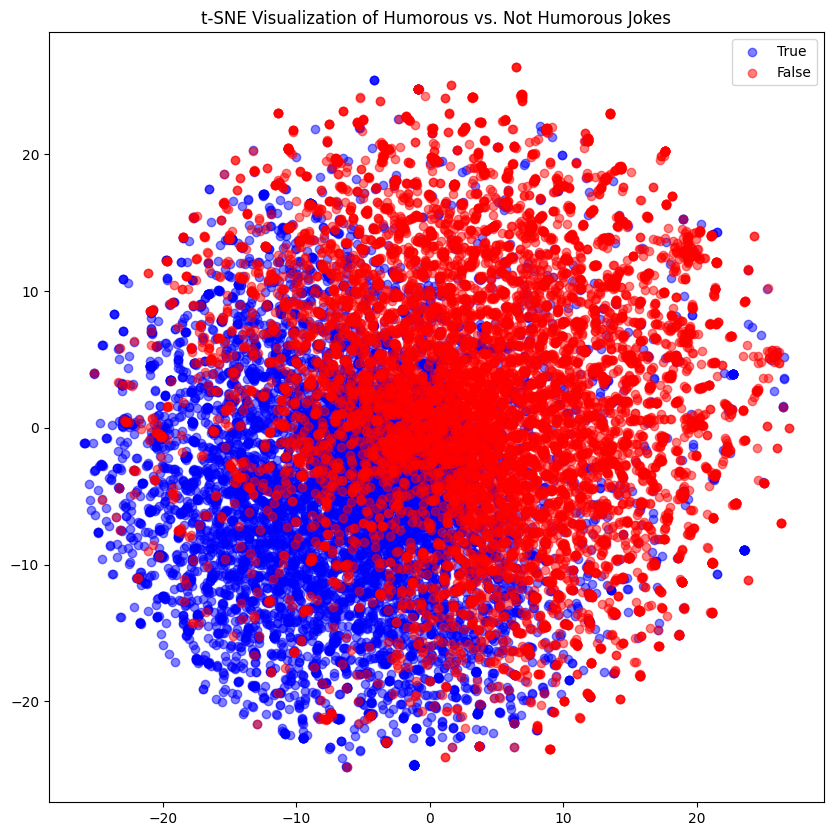

In [ ]:
import numpy as np 

# Visualize the t-SNE results
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['blue', 'red']
for i, label in enumerate([True, False]):
    ax.scatter(tsne_results[:, 0][np.where(y == i)], 
               tsne_results[:, 1][np.where(y == i)], 
               c=colors[i], label=label, alpha=0.5)
ax.legend()
ax.set_title('t-SNE Visualization of Humorous vs. Not Humorous Jokes')
plt.show()
